In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Sizzlo/Data-698/main/data.csv")
print(data.shape)
data.head(5)

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## 1.2 Info , describe
- All features are numeric
- one features has 0 variance that is constant throughout
- major features are in the range of 0-1
- there are outlier infected features

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [5]:
#Rename columns 
print("Column names before renaming","\n", data.columns[:5],"\n")
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(" " ,"_")
data.rename(columns = {'Bankrupt?' :'Bankrupt' },inplace=True)
print("Column names after renaming","\n",data.columns[:5])

Column names before renaming 
 Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin'],
      dtype='object') 

Column names after renaming 
 Index(['Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin'],
      dtype='object')


In [6]:
data.drop(['Net_Income_Flag'],axis=1,inplace=True) ## drop constant columns


In [7]:
data.duplicated(keep=False).sum()  ## no duplicates


0

In [8]:
data.isnull().values.sum() # check missing values

0

In [9]:
df1 = pd.DataFrame(data.Bankrupt.value_counts())
df2 = pd.DataFrame(100*data.Bankrupt.value_counts(normalize=True).astype(float))
tab = df1.merge(df2,left_index=True,right_index=True).rename(columns = {"Bankrupt_x" : "Count" , "Bankrupt_y" : "Percentage"})
print(tab)

   Count  Percentage
0   6599    96.77372
1    220     3.22628


C:\Users\Tone\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


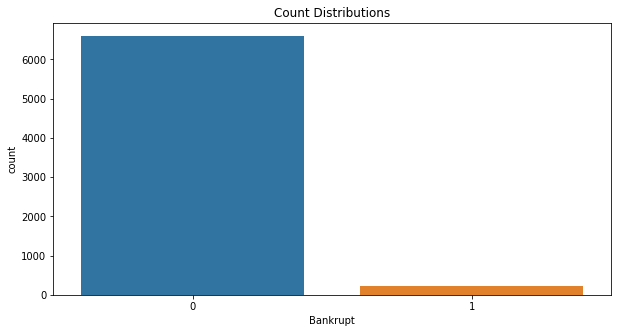

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(data['Bankrupt'])
plt.title('Count Distributions', fontsize=12)
plt.show()

Bankruptcy Rate is around 3.2%

In [11]:
## fn to separate only-fractional & other columns
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (data[col].max()<=1) & (data[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=data.drop(['Bankrupt'],axis=1))
non_fraction_columns = data.drop(['Bankrupt'],axis=1).columns.difference(fractional_columns)
print("# Fraction-only Columns",len(fractional_columns),"\t","# Other than Fraction-only Columns", len(non_fraction_columns))

# Fraction-only Columns 70 	 # Other than Fraction-only Columns 24


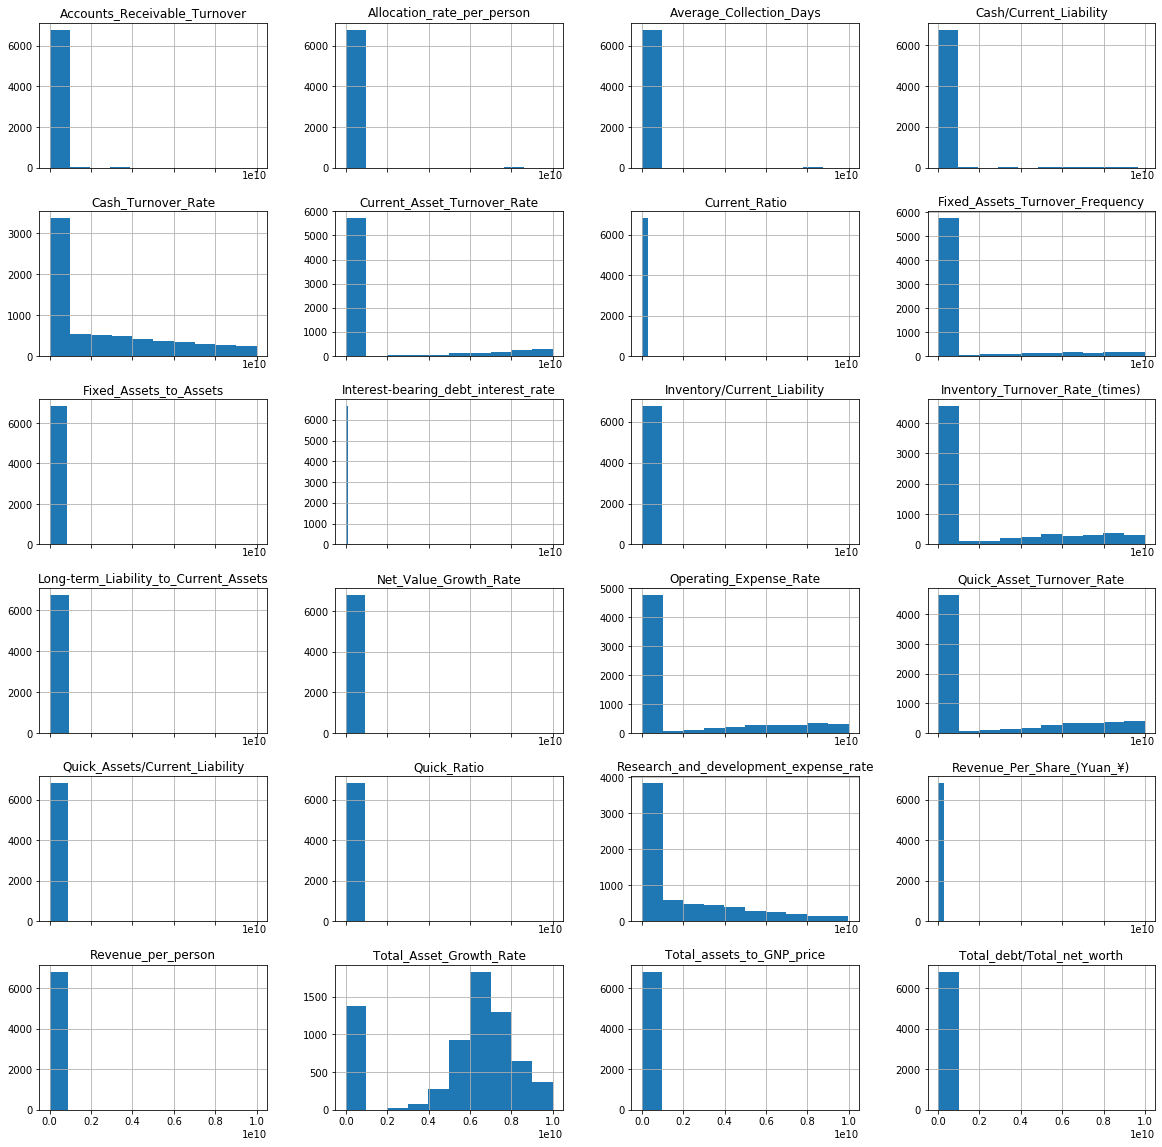

In [12]:
data[non_fraction_columns].hist(figsize= (20,20),sharex=True,layout= (6,4))
plt.show()

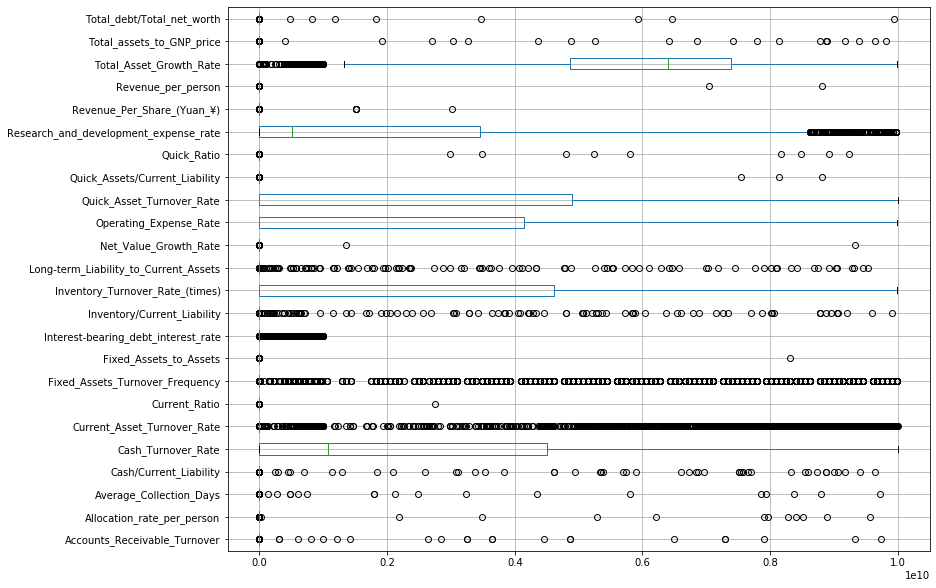

In [13]:
#observing the outliers of the data
data[non_fraction_columns].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.show()

In [14]:
## Outlier handling techniques
log_transformed_cols = []
for col in data[non_fraction_columns].columns:
    if (data[col].quantile(1) >= 100* data[col].quantile(0.99)) |  (sum(data[col] > data[col].quantile(0.99)) <= 10):
        data[col] = np.log1p(data[col])
        log_transformed_cols.append(col)
        
## Change names of log transformed column
log_names = "log_" + data[log_transformed_cols].columns
data.rename(columns={data[log_transformed_cols].columns[i]: log_names[i] for i in range(len(log_names))}, inplace = True)
#data.columns

The following features are log transformed after they fulfill outlier detection condition. 

 ['Accounts_Receivable_Turnover', 'Allocation_rate_per_person', 'Average_Collection_Days', 'Cash/Current_Liability', 'Current_Ratio', 'Fixed_Assets_to_Assets', 'Net_Value_Growth_Rate', 'Quick_Assets/Current_Liability', 'Quick_Ratio', 'Revenue_Per_Share_(Yuan_¥)', 'Revenue_per_person', 'Total_assets_to_GNP_price', 'Total_debt/Total_net_worth']


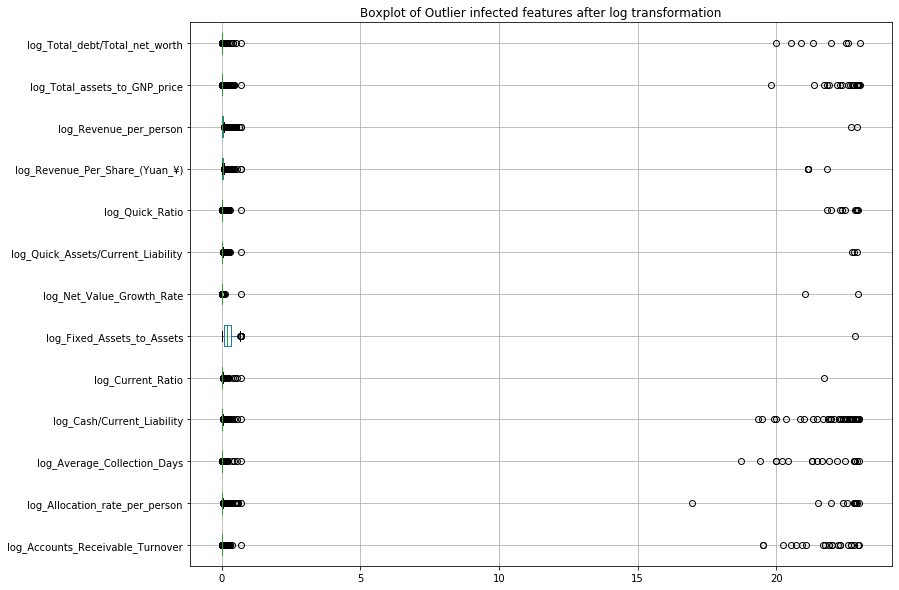

In [15]:
print("The following features are log transformed after they fulfill outlier detection condition.","\n\n",log_transformed_cols)
data[log_names].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.title("Boxplot of Outlier infected features after log transformation")
plt.show()

In [16]:
#corr_mat = data.corr()

In [17]:
#corr_mat = corr_mat.iloc[1:,1:]

In [18]:
#drop_list = []
#for i in range(len(corr_mat.columns)):
    #for j in range(i):
        #if(corr_mat.iloc[i,j] >= 0.95 or corr_mat.iloc[i,j] <= -0.95):
            #if corr_mat.columns[j] not in drop_list:
                #drop_list.append(corr_mat.columns[j])    

In [19]:
#len(drop_list)

In [20]:
#data = data.drop(drop_list, axis = 1)

In [21]:
#len(data.columns)

# Modeling

In [22]:
X = data.drop(["Bankrupt"],axis=1)
y = data.Bankrupt

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2 , mutual_info_classif 
from imblearn.over_sampling import SMOTE 

In [24]:
X_scaled = pd.DataFrame(StandardScaler(copy=False).fit_transform(X))
X_scaled.columns = X.columns

In [25]:
mutual_info = mutual_info_classif(X= X_scaled,y= y)  # get mutual info all predictors
pruned_features = X.columns[np.where(mutual_info>0)]  # retain features only with mi >0
X_scaled_pruned = X_scaled[pruned_features]

# Balance Data using SMOTE

In [26]:
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X_scaled_pruned,y)

print(f'''Shape of X before SMOTE:{X_scaled_pruned.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(6819, 87)
Shape of X after SMOTE:(13198, 87) 


Target Class distributuion before SMOTE:
0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: Bankrupt, dtype: float64


## Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics

In [28]:
x_train , x_test , y_train ,y_test = train_test_split(X_sm,y_sm,test_size= 0.30)

In [29]:
from sklearn.linear_model import LogisticRegression
lr_fit = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=10000).fit(x_train,y_train)

In [30]:
lr_pred = lr_fit.predict_proba(x_test)  ## predicted probabilities
lr_pred = lr_pred[:,1]  #prob(Bankrupt=0)

lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test,  lr_pred)  #fpr, tpr for AUC
lr_auc = metrics.roc_auc_score(y_test,lr_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table.set_index('classifiers', inplace=True)
result_table = result_table.append({'classifiers':"Logistic Regression",
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':lr_auc}, ignore_index=True)

print('Logistic Regression AUC=%.3f' % (lr_auc))

Logistic Regression AUC=0.956


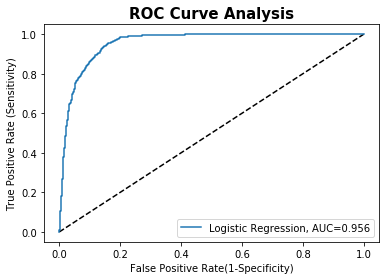

In [31]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

In [32]:
yhat = lr_fit.predict(x_test,)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.89      0.88      0.88      1941
Fin.Unstable       0.88      0.90      0.89      2019

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

Confusion Matrix : 
 [[1703  238]
 [ 208 1811]]


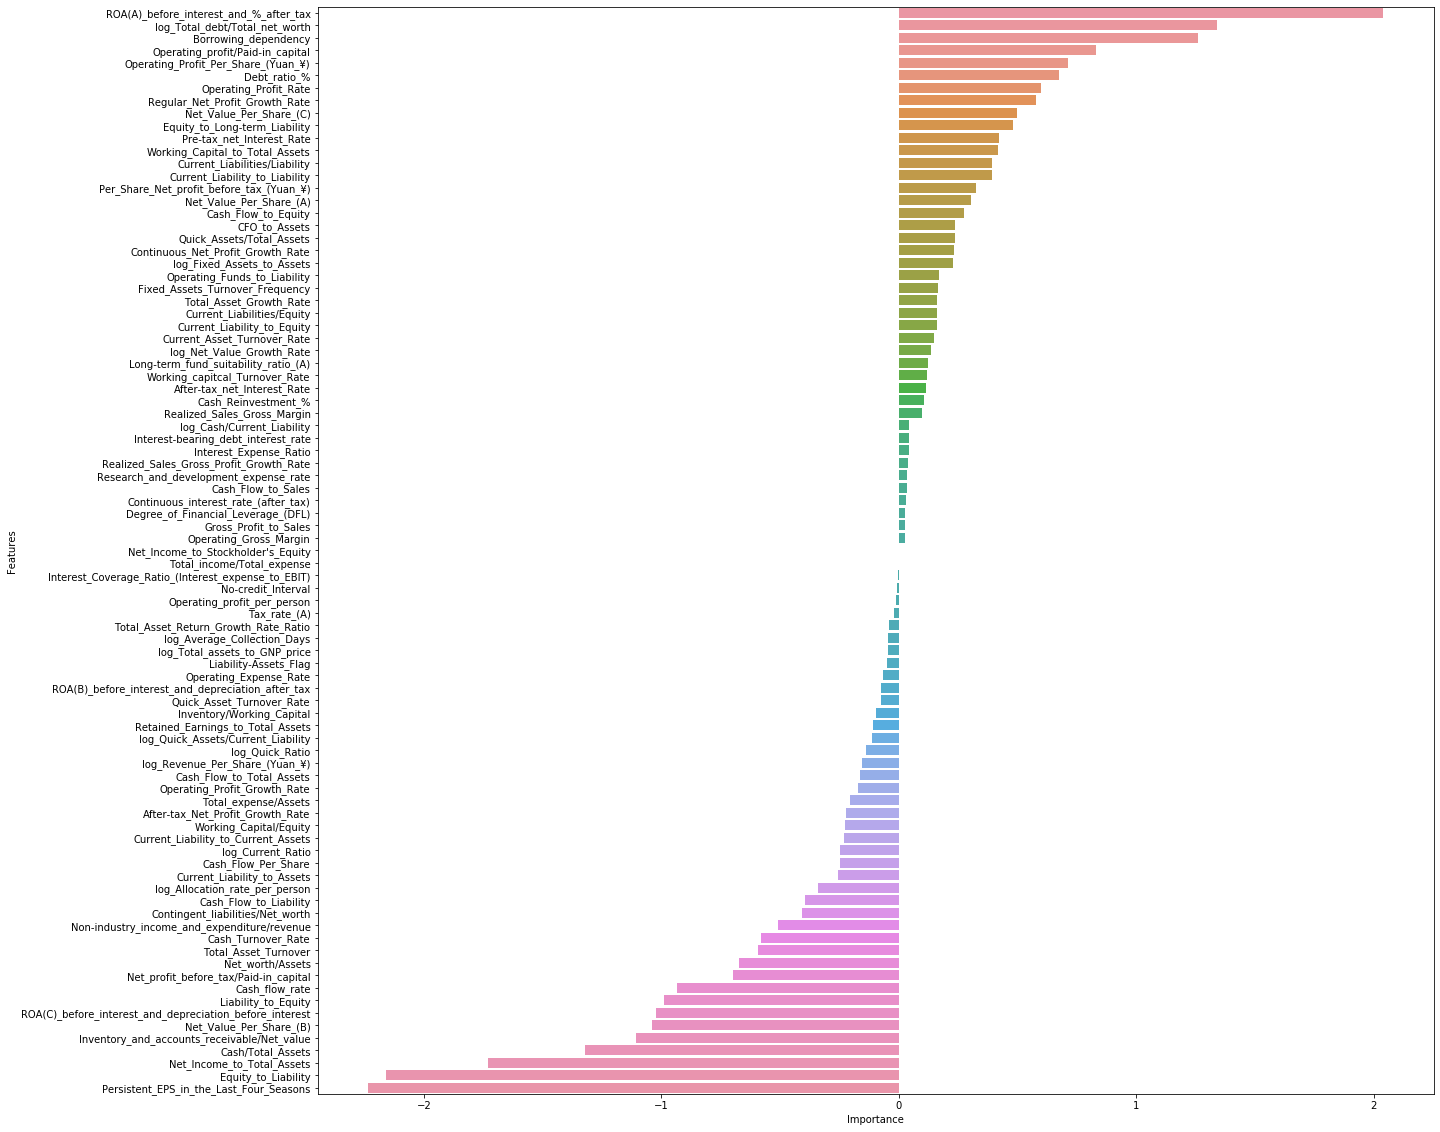

In [33]:
var_imp = pd.concat([pd.DataFrame(X_scaled_pruned.columns),pd.DataFrame(np.transpose(lr_fit.coef_))],axis=1)
var_imp.columns = ['Features', 'Importance']
var_imp = var_imp.sort_values('Importance',ascending = False)
plt.figure(figsize=(20,20))
sns.barplot(y= 'Features',x= 'Importance',data= var_imp,orient='h')

## 2 Support Vector Classifier

In [34]:
from sklearn import svm

In [35]:
svc_fit = svm.SVC(C=1,kernel= 'linear',degree=3,probability=True).fit(x_train,y_train)

In [36]:
svc_pred = svc_fit.predict_proba(x_test)
svc_pred = svc_pred[:,1]

svc_fpr, svc_tpr, _ = metrics.roc_curve(y_test,  svc_pred)
svc_auc = metrics.roc_auc_score(y_test,svc_pred)

result_table = result_table.append({'classifiers':"Support Vector Classifier",
                                        'fpr':svc_fpr, 
                                        'tpr':svc_tpr, 
                                        'auc':svc_auc}, ignore_index=True)

print('Support Vector Classifier AUC =%.3f' % (svc_auc))

Support Vector Classifier AUC =0.955


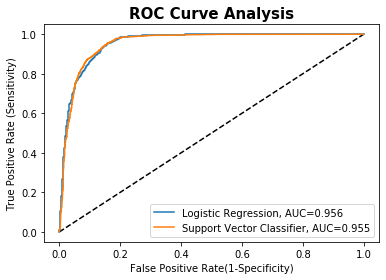

In [37]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

In [38]:
yhat = svc_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.91      0.87      0.89      1941
Fin.Unstable       0.88      0.92      0.90      2019

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

Confusion Matrix : 
 [[1690  251]
 [ 171 1848]]


## Gradient Boosted Classifiers

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,random_state=123,subsample=0.8,n_estimators=600)
gbc_fit = gbc.fit(x_train,y_train)

In [41]:
gbc_pred = gbc_fit.predict_proba(x_test)
gbc_pred = gbc_pred[:,1]

gbc_fpr, gbc_tpr, _ = metrics.roc_curve(y_test,  gbc_pred)
gbc_auc = metrics.roc_auc_score(y_test,gbc_pred)

result_table = result_table.append({'classifiers':"Gradient Boosted Classifier",
                                    'fpr':gbc_fpr, 
                                    'tpr':gbc_tpr, 
                                    'auc':gbc_auc}, ignore_index=True)


print('Gradient Boosted Classifier AUC=%.3f' % (gbc_auc))

Gradient Boosted Classifier AUC=0.995


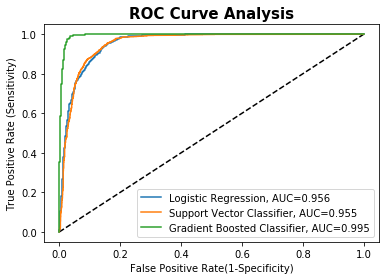

In [42]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.plot(gbc_fpr,gbc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

In [43]:
yhat = gbc_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.96      0.97      1941
Fin.Unstable       0.96      0.99      0.98      2019

    accuracy                           0.97      3960
   macro avg       0.98      0.97      0.97      3960
weighted avg       0.98      0.97      0.97      3960

Confusion Matrix : 
 [[1857   84]
 [  15 2004]]


Plot analysis of the 3 models

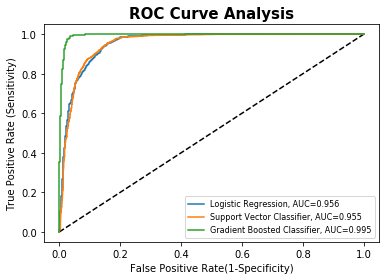

In [44]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.plot(gbc_fpr,gbc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')
plt.show()

Conclusion:

Seems like Gradient Boosted Classifer is the best model with :
AUC of 99.5%, 
97% accuracy,
97% F1 accuracy





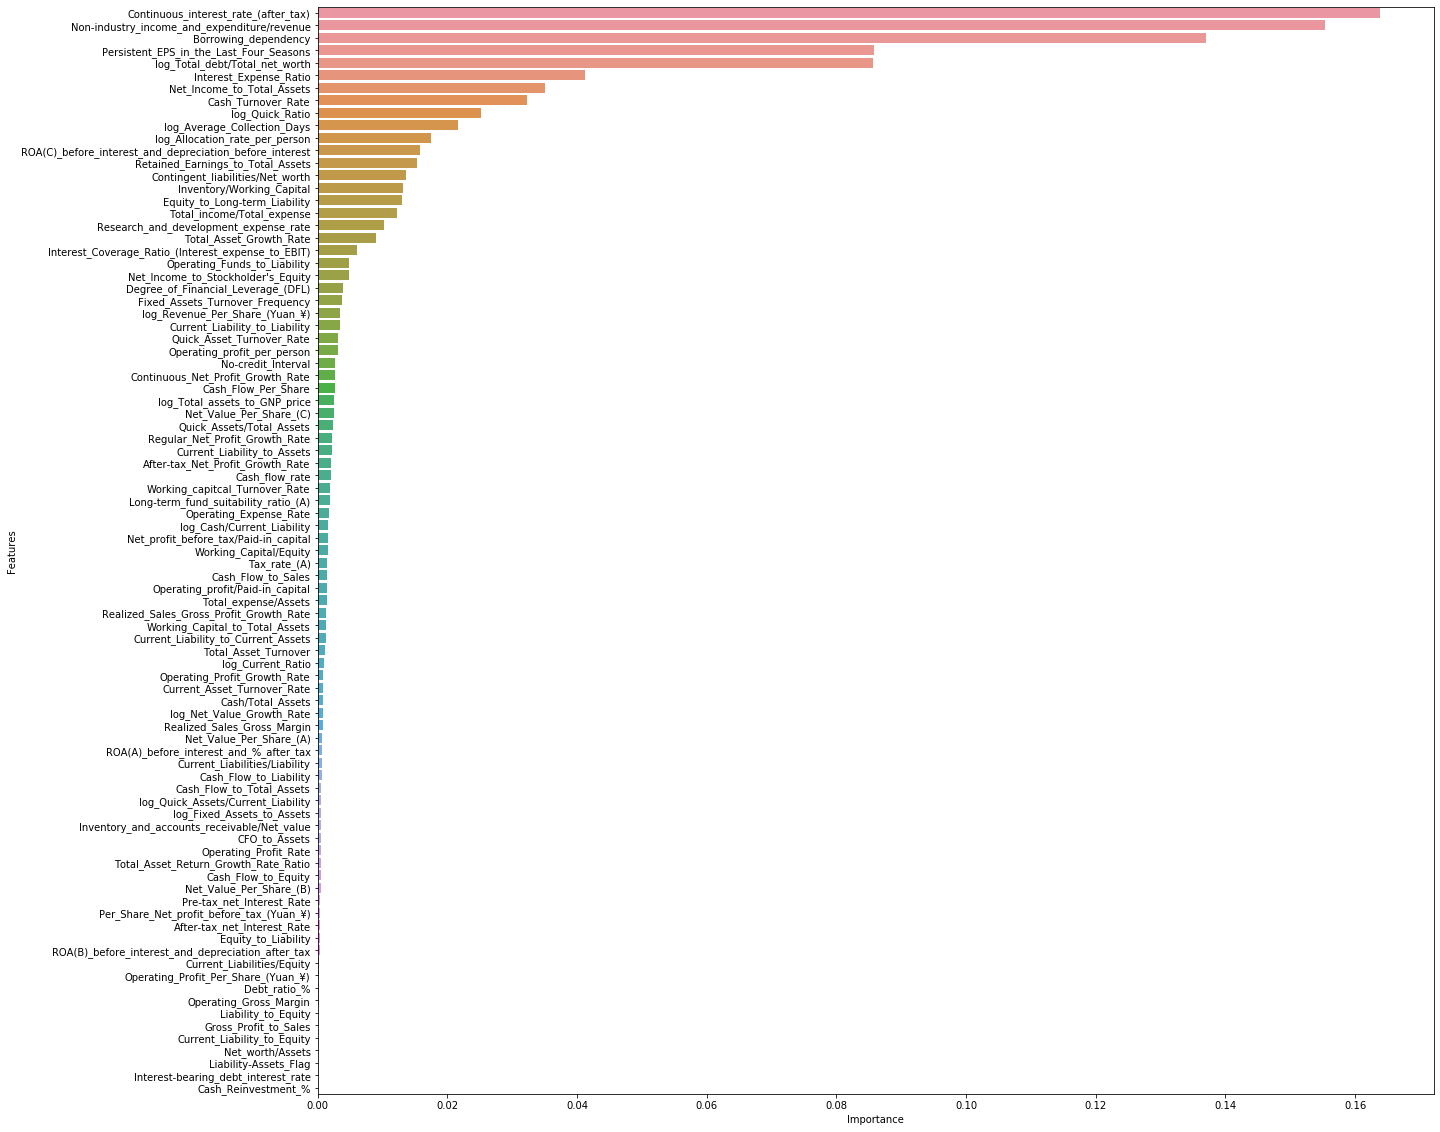

In [45]:
var_imp = pd.concat([pd.DataFrame(X_scaled_pruned.columns),pd.DataFrame(np.transpose(gbc_fit.feature_importances_))],axis=1)
var_imp.columns = ['Features', 'Importance']
var_imp = var_imp.sort_values('Importance',ascending = False)
plt.figure(figsize=(20,20))
sns.barplot(y= 'Features',x= 'Importance',data= var_imp,orient='h')

# K Nearest Neighbors

In [46]:
knn = KNeighborsClassifier(n_neighbors=3,algorithm = 'auto')
knn_fit = knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [47]:
yhat = knn_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))
# Printing Confusion Matrix
pd.DataFrame(confusion_matrix(y_test,knn_pred))

              precision    recall  f1-score   support

  Fin.Stable       1.00      0.90      0.95      1941
Fin.Unstable       0.91      1.00      0.95      2019

    accuracy                           0.95      3960
   macro avg       0.96      0.95      0.95      3960
weighted avg       0.96      0.95      0.95      3960

Confusion Matrix : 
 [[1749  192]
 [   0 2019]]


,0,1
0,1749,192
1,0,2019


In [48]:
knn_pred = knn_fit.predict_proba(x_test)  ## predicted probabilities
knn_pred = knn_pred[:,1]  #prob(Bankrupt=0)

knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test,  knn_pred)  #fpr, tpr for AUC
knn_auc = metrics.roc_auc_score(y_test,knn_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = result_table.append({'classifiers':"KNN",
                                    'fpr':knn_fpr, 
                                    'tpr':knn_tpr, 
                                    'auc':knn_auc}, ignore_index=True)

print('KNN AUC=%.3f' % (knn_auc))

KNN AUC=0.975


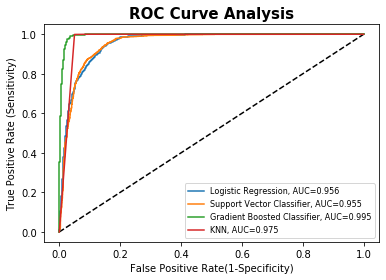

In [49]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.plot(gbc_fpr,gbc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
plt.plot(knn_fpr,knn_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[3,'classifiers'], result_table.loc[3]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')
plt.show()